## Assignment-16: Text Mining

###  Extract Reviews of any product from e-Commerce Website like Amazon & Perform Emotion Mining

## 1. Import Necessary Libraries

In [1]:
import pandas as pd

import string
import spacy
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import tokenize

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## 2. Load the Data

In [2]:
reviews_data=pd.read_excel('Reviews.xlsx')
reviews_data

,Customer,Ratings,Highlight,Description
0,Shiva,5.0 out of 5 stars,Super satisfied!!!,I am changing review after using Ninja calling...
1,Irukulla Bharath,5.0 out of 5 stars,Premium Watch in budget price,Bought for my sister. Watch is good looking an...
2,Dr. Vikram,5.0 out of 5 stars,Amazing performance much satisfied,Overall product is good.. Perfectly working al...
3,adiseshu,5.0 out of 5 stars,Good,Good
4,VIREN AJIT BHAI PATEL,1.0 out of 5 stars,very low quality and like speaker dont buy as ...,watch and dont work properly so do not buy thi...
...,...,...,...,...
94,Sudhir Kumar,5.0 out of 5 stars,AMAZING,It's jusy amazing. Just go for it. It's total ...
95,Rishi D.,2.0 out of 5 stars,Connectivity and contects sync issue,The connectivity gets lost with phone and only...
96,Ganesh M.,4.0 out of 5 stars,Worth buying....have almost every feature.,Very nice watch.It has almost every feature. C...
97,Jay Desai,5.0 out of 5 stars,PRODUCT IS WORTHFUL,This product is useful and worthful. This watc...


## 3. Data Understanding

**I have extracted data from Amazon website for the product 'Fire Boltt Smart Watch' with the help of Octoparse application**<br>

**Link**: https://www.amazon.in/Fire-Boltt-Bluetooth-Smartwatch-Monitoring-Assistant/dp/B09RKDT1LG/ref=cm_cr_arp_d_product_top?ie=UTF8&th=1

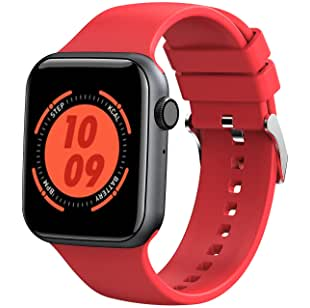
The data contains:<br>
- Customer Name : The customers who have experienced this product.
- Ratings : Number of stars given by the customers out of 5
- Highlight : Overview of the customer's experience
- Description : Detailed review of the product by the customer

### Initial Analysis

In [3]:
reviews_data.shape

(99, 4)

In [4]:
reviews_data.isna().sum()

Customer       0
Ratings        0
Highlight      0
Description    1
dtype: int64

In [5]:
reviews_data.dtypes

Customer       object
Ratings        object
Highlight      object
Description    object
dtype: object

## 4. Data Preprocessing

In [6]:
reviews_data.dropna(axis=0, inplace=True)

In [7]:
reviews_data.isna().sum()

Customer       0
Ratings        0
Highlight      0
Description    0
dtype: int64

In [8]:
# We need only Description feature
reviews=reviews_data[['Description']]
reviews

,Description
0,I am changing review after using Ninja calling...
1,Bought for my sister. Watch is good looking an...
2,Overall product is good.. Perfectly working al...
3,Good
4,watch and dont work properly so do not buy thi...
...,...
94,It's jusy amazing. Just go for it. It's total ...
95,The connectivity gets lost with phone and only...
96,Very nice watch.It has almost every feature. C...
97,This product is useful and worthful. This watc...


In [9]:
#Remove both the leading and the trailing white spaces
reviews=[i.strip() for i in reviews.Description] 
reviews[:10]

['I am changing review after using Ninja calling for 2 day.. this is just amazing, more value for money. Just go for it.If you want to turn off Media sound, it is available at Bluetooth options, many people do not know this.(see in image)',
 'Bought for my sister. Watch is good looking and almost has all the features.',
 'Overall product is good.. Perfectly working also sound is upto mark and can take calls easily',
 'Good',
 'watch and dont work properly so do not buy this product and not mention by amazon all functions this watch is only like speaker your all voice of mobile hear in only in watch not in mobile so this is like speaker not use as smart watch so end of the review not buy this product and another product by this seller on amazon i complain to amazon service not mention proper and they replied me watch is perfect they side seller not customer',
 "I didn't like the features of this watch",
 'Video Player is loading.',
 'Overall good to use , expecting some updates\n\nCons\

In [10]:
# Joining the list into one string/text
review_text=' '.join(reviews)
review_text[:1000]

"I am changing review after using Ninja calling for 2 day.. this is just amazing, more value for money. Just go for it.If you want to turn off Media sound, it is available at Bluetooth options, many people do not know this.(see in image) Bought for my sister. Watch is good looking and almost has all the features. Overall product is good.. Perfectly working also sound is upto mark and can take calls easily Good watch and dont work properly so do not buy this product and not mention by amazon all functions this watch is only like speaker your all voice of mobile hear in only in watch not in mobile so this is like speaker not use as smart watch so end of the review not buy this product and another product by this seller on amazon i complain to amazon service not mention proper and they replied me watch is perfect they side seller not customer I didn't like the features of this watch Video Player is loading. Overall good to use , expecting some updates\n\nCons\nThe raise to wake option is 

In [11]:
# Remove Punctuations 
no_punc_text=review_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'I am changing review after using Ninja calling for 2 day this is just amazing more value for money Just go for itIf you want to turn off Media sound it is available at Bluetooth options many people do not know thissee in image Bought for my sister Watch is good looking and almost has all the features Overall product is good Perfectly working also sound is upto mark and can take calls easily Good watch and dont work properly so do not buy this product and not mention by amazon all functions this watch is only like speaker your all voice of mobile hear in only in watch not in mobile so this is like speaker not use as smart watch so end of the review not buy this product and another product by this seller on amazon i complain to amazon service not mention proper and they replied me watch is perfect they side seller not customer I didnt like the features of this watch Video Player is loading Overall good to use  expecting some updates\n\nCons\nThe raise to wake option is very slow and not

In [12]:
# Tokenization
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[:50])

['I', 'am', 'changing', 'review', 'after', 'using', 'Ninja', 'calling', 'for', '2', 'day', 'this', 'is', 'just', 'amazing', 'more', 'value', 'for', 'money', 'Just', 'go', 'for', 'itIf', 'you', 'want', 'to', 'turn', 'off', 'Media', 'sound', 'it', 'is', 'available', 'at', 'Bluetooth', 'options', 'many', 'people', 'do', 'not', 'know', 'thissee', 'in', 'image', 'Bought', 'for', 'my', 'sister', 'Watch', 'is']


In [13]:
# Remove stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A','Ive']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['changing', 'review', 'using', 'Ninja', 'calling', '2', 'day', 'amazing', 'value', 'money', 'Just', 'go', 'itIf', 'want', 'turn', 'Media', 'sound', 'available', 'Bluetooth', 'options', 'many', 'people', 'know', 'thissee', 'image', 'Bought', 'sister', 'Watch', 'good', 'looking', 'almost', 'features', 'Overall', 'product', 'good', 'Perfectly', 'working', 'also', 'sound', 'upto', 'mark', 'take', 'calls', 'easily', 'Good', 'watch', 'dont', 'work', 'properly', 'buy', 'product', 'mention', 'amazon', 'functions', 'watch', 'like', 'speaker', 'voice', 'mobile', 'hear', 'watch', 'mobile', 'like', 'speaker', 'use', 'smart', 'watch', 'end', 'review', 'buy', 'product', 'another', 'product', 'seller', 'amazon', 'complain', 'amazon', 'service', 'mention', 'proper', 'replied', 'watch', 'perfect', 'side', 'seller', 'customer', 'didnt', 'like', 'features', 'watch', 'Video', 'Player', 'loading', 'Overall', 'good', 'use', 'expecting', 'updates', 'Cons', 'raise']


In [14]:
# Normalize the data
lower_words=[i.lower() for i in no_stop_tokens]
print(lower_words[:100])

['changing', 'review', 'using', 'ninja', 'calling', '2', 'day', 'amazing', 'value', 'money', 'just', 'go', 'itif', 'want', 'turn', 'media', 'sound', 'available', 'bluetooth', 'options', 'many', 'people', 'know', 'thissee', 'image', 'bought', 'sister', 'watch', 'good', 'looking', 'almost', 'features', 'overall', 'product', 'good', 'perfectly', 'working', 'also', 'sound', 'upto', 'mark', 'take', 'calls', 'easily', 'good', 'watch', 'dont', 'work', 'properly', 'buy', 'product', 'mention', 'amazon', 'functions', 'watch', 'like', 'speaker', 'voice', 'mobile', 'hear', 'watch', 'mobile', 'like', 'speaker', 'use', 'smart', 'watch', 'end', 'review', 'buy', 'product', 'another', 'product', 'seller', 'amazon', 'complain', 'amazon', 'service', 'mention', 'proper', 'replied', 'watch', 'perfect', 'side', 'seller', 'customer', 'didnt', 'like', 'features', 'watch', 'video', 'player', 'loading', 'overall', 'good', 'use', 'expecting', 'updates', 'cons', 'raise']


In [15]:
# Lemmatization
nlp=spacy.load('en_core_web_md')
doc=nlp(' '.join(lower_words))
print(doc[:100])

changing review using ninja calling 2 day amazing value money just go itif want turn media sound available bluetooth options many people know thissee image bought sister watch good looking almost features overall product good perfectly working also sound upto mark take calls easily good watch dont work properly buy product mention amazon functions watch like speaker voice mobile hear watch mobile like speaker use smart watch end review buy product another product seller amazon complain amazon service mention proper replied watch perfect side seller customer didnt like features watch video player loading overall good use expecting updates


In [16]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['change', 'review', 'use', 'ninja', 'call', '2', 'day', 'amazing', 'value', 'money', 'just', 'go', 'itif', 'want', 'turn', 'medium', 'sound', 'available', 'bluetooth', 'option', 'many', 'people', 'know', 'thissee', 'image', 'buy', 'sister', 'watch', 'good', 'look', 'almost', 'feature', 'overall', 'product', 'good', 'perfectly', 'work', 'also', 'sound', 'upto', 'mark', 'take', 'call', 'easily', 'good', 'watch', 'do', 'not', 'work', 'properly', 'buy', 'product', 'mention', 'amazon', 'function', 'watch', 'like', 'speaker', 'voice', 'mobile', 'hear', 'watch', 'mobile', 'like', 'speaker', 'use', 'smart', 'watch', 'end', 'review', 'buy', 'product', 'another', 'product', 'seller', 'amazon', 'complain', 'amazon', 'service', 'mention', 'proper', 'reply', 'watch', 'perfect', 'side', 'seller', 'customer', 'do', 'not', 'like', 'feature', 'watch', 'video', 'player', 'load', 'overall', 'good', 'use', 'expect', 'update']


In [17]:
clean_reviews=' '.join(lemmas)
clean_reviews[:1000]

'change review use ninja call 2 day amazing value money just go itif want turn medium sound available bluetooth option many people know thissee image buy sister watch good look almost feature overall product good perfectly work also sound upto mark take call easily good watch do not work properly buy product mention amazon function watch like speaker voice mobile hear watch mobile like speaker use smart watch end review buy product another product seller amazon complain amazon service mention proper reply watch perfect side seller customer do not like feature watch video player load overall good use expect update con raise wake option slow good touch wake also available strap good attract dust quality also good but overall good buy price range call good many good option give reviewer say u connect watch phone audio result watch speaker tackle bluetooth setting u phone audio smartwatch bluetooth setting phone calling also ur preference phone next time automatically phone earpiece use wa

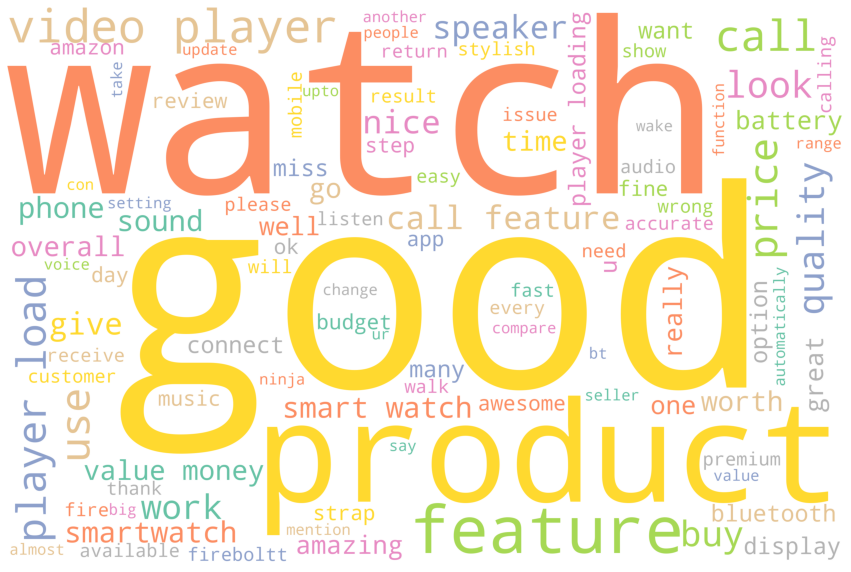

In [18]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## 5. Model Building: Emotional Mining

In [19]:
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences[:6]

['I am changing review after using Ninja calling for 2 day.. this is just amazing, more value for money.',
 'Just go for it.If you want to turn off Media sound, it is available at Bluetooth options, many people do not know this.',
 '(see in image) Bought for my sister.',
 'Watch is good looking and almost has all the features.',
 'Overall product is good..',
 "Perfectly working also sound is upto mark and can take calls easily Good watch and dont work properly so do not buy this product and not mention by amazon all functions this watch is only like speaker your all voice of mobile hear in only in watch not in mobile so this is like speaker not use as smart watch so end of the review not buy this product and another product by this seller on amazon i complain to amazon service not mention proper and they replied me watch is perfect they side seller not customer I didn't like the features of this watch Video Player is loading."]

In [20]:
review_data=pd.DataFrame(sentences,columns=['sentence'])
review_data.head(10)

,sentence
0,I am changing review after using Ninja calling...
1,Just go for it.If you want to turn off Media s...
2,(see in image) Bought for my sister.
3,Watch is good looking and almost has all the f...
4,Overall product is good..
5,Perfectly working also sound is upto mark and ...
6,"Overall good to use , expecting some updates\n..."
7,"Good to buy For Rs2900, with call recvng optio..."
8,1.
9,Good for this price\n2.


In [21]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [22]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [23]:
# Custom function: Score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_md')
emotional_lexicon=affinity_scores

def calculate_emotion(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=emotional_lexicon.get(word.lemma_,0)
    return sent_score

In [24]:
# manual testing
calculate_emotion(text='Awesome product')

4

In [25]:
# Calculating sentiment value for each sentence
review_data['Emotion_value']=review_data['sentence'].apply(calculate_emotion)
review_data.head()

,sentence,Emotion_value
0,I am changing review after using Ninja calling...,4
1,Just go for it.If you want to turn off Media s...,1
2,(see in image) Bought for my sister.,0
3,Watch is good looking and almost has all the f...,3
4,Overall product is good..,3


In [26]:
review_data['Emotion']=review_data['Emotion_value'].apply(lambda x: 'Happy Customer' if x>0 else ('Satisified Customer' if x==0 else 'Sad Customer'))
review_data.head(10)

,sentence,Emotion_value,Emotion
0,I am changing review after using Ninja calling...,4,Happy Customer
1,Just go for it.If you want to turn off Media s...,1,Happy Customer
2,(see in image) Bought for my sister.,0,Satisified Customer
3,Watch is good looking and almost has all the f...,3,Happy Customer
4,Overall product is good..,3,Happy Customer
5,Perfectly working also sound is upto mark and ...,14,Happy Customer
6,"Overall good to use , expecting some updates\n...",23,Happy Customer
7,"Good to buy For Rs2900, with call recvng optio...",1,Happy Customer
8,1.,0,Satisified Customer
9,Good for this price\n2.,3,Happy Customer


In [27]:
review_data['Emotion'].value_counts()

Happy Customer         71
Satisified Customer    38
Sad Customer            3
Name: Emotion, dtype: int64

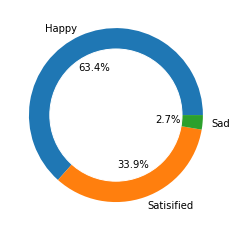

In [28]:
plt.pie(x=review_data['Emotion'].value_counts(), labels=['Happy','Satisified','Sad'], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

**Conclusion:**<br>
From the review I have extracted for the product 'Fire Boltt Smart Watch', 63% of the customers are happy, 34% of the customers are satisified and 3% of the customers are not happy with the product.